# Atividade: Preparação e Análise de Dados para Redes Neurais

Esta atividade consiste em gerar conjuntos de dados sintéticos, investigar sua separabilidade e preparar um conjunto de dados real para uso em redes neurais. O objetivo é praticar técnicas de geração, visualização e pré‑processamento de dados, com foco na criação de entradas adequadas para modelos com funções de ativação como `tanh`.

As instruções e parâmetros utilizados aqui seguem o enunciado da disciplina. Optou‑se pelo uso de um número reduzido de bibliotecas: apenas `numpy`, `pandas` e `matplotlib`, suficientes para manipular dados numéricos, visualizar gráficos e ler arquivos CSV.


## Como executar este notebook

Para rodar este notebook, recomenda‑se criar um ambiente virtual e instalar apenas as bibliotecas necessárias:

```bash
python -m venv .venv
source .venv/bin/activate  # Windows: .venv\Scriptsctivate
pip install numpy pandas matplotlib
```

Em seguida, coloque este arquivo (`ex1_pedrotpc_pt.ipynb`) em uma pasta de trabalho e, se desejar executar o Exercício 3, baixe o arquivo `train.csv` do conjunto **Spaceship Titanic** (Kaggle) e salve na mesma pasta.

Abra o Jupyter Notebook com `jupyter notebook` ou `jupyter lab` e execute as células na ordem.


## Exercício 1 – Explorar a separabilidade das classes em 2D

Neste exercício vamos gerar um conjunto de dados bidimensional com quatro classes distintas. Cada classe será modelada por uma distribuição normal (gaussiana) com média e desvio padrão definidos pelo enunciado:

- **Classe 0**: média = [2, 3], desvio padrão = [0,8, 2,5]
- **Classe 1**: média = [5, 6], desvio padrão = [1,2, 1,9]
- **Classe 2**: média = [8, 1], desvio padrão = [0,9, 0,9]
- **Classe 3**: média = [15, 4], desvio padrão = [0,5, 2,0]

Geraremos 100 amostras por classe, totalizando 400 pontos. O objetivo é visualizar os pontos em um gráfico de dispersão (scatter plot) e discutir visualmente se um classificador linear seria capaz de separar todas as classes.


Formato do conjunto: (400, 2), rótulos: (400,)


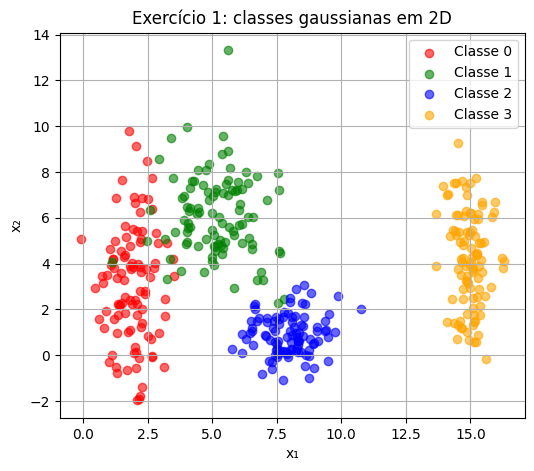

In [1]:
# Exercício 1 – Gerar e visualizar o conjunto 2D
import numpy as np
import matplotlib.pyplot as plt

# Semente para reprodutibilidade
np.random.seed(42)

# Definição das médias e desvios para cada classe
medias = np.array([[2, 3], [5, 6], [8, 1], [15, 4]], dtype=float)
desvios = np.array([[0.8, 2.5], [1.2, 1.9], [0.9, 0.9], [0.5, 2.0]], dtype=float)

# Geração das amostras
n_por_classe = 100
X_parts = []
y_parts = []
for i, (mu, sigma) in enumerate(zip(medias, desvios)):
    # cada dimensão tem seu próprio desvio; multiplicamos pelo desvio e somamos a média
    pts = np.random.randn(n_por_classe, 2) * sigma + mu
    labels = np.full(n_por_classe, i)
    X_parts.append(pts)
    y_parts.append(labels)

# Concatenar todas as classes
X1 = np.vstack(X_parts)
y1 = np.concatenate(y_parts)

print(f"Formato do conjunto: {X1.shape}, rótulos: {y1.shape}")

# Plotar os pontos
cores = ['red', 'green', 'blue', 'orange']
plt.figure(figsize=(6, 5))
for i in range(4):
    plt.scatter(X1[y1 == i, 0], X1[y1 == i, 1], color=cores[i], label=f"Classe {i}", alpha=0.6)

plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('Exercício 1: classes gaussianas em 2D')
plt.legend()
plt.grid(True)
plt.show()


### Análise do Exercício 1

O gráfico mostra quatro agrupamentos distintos de pontos. Nota‑se que as três primeiras classes (0, 1 e 2) ficam relativamente próximas, com sobreposição parcial entre classes 0 e 1 e entre classes 1 e 2. A classe 3 está afastada, à direita.

Devido a essa sobreposição entre as classes próximas, um classificador linear (como um perceptron simples) não seria capaz de traçar uma única linha reta que separe todas as classes ao mesmo tempo. Em vez disso, seriam necessárias regiões de decisão curvas ou múltiplas fronteiras. Redes neurais com funções de ativação não lineares podem aprender essas fronteiras complexas, ajustando‑se ao contorno dos agrupamentos.


## Exercício 2 – Não linearidade em dimensões mais altas

Aqui vamos estudar um caso em que os dados são originalmente de cinco dimensões (5D) e não são linearmente separáveis. Geraremos dois grupos:

- **Classe A**: 500 amostras de uma normal multivariada com média \(\mu_A = [0, 0, 0, 0, 0]\) e matriz de covariância \(\Sigma_A\) definida pelo enunciado:


\(\Sigma_A = egin{pmatrix}
1{,}0 & 0{,}8 & 0{,}1 & 0{,}0 & 0{,}0\
0{,}8 & 1{,}0 & 0{,}3 & 0{,}0 & 0{,}0\
0{,}1 & 0{,}3 & 1{,}0 & 0{,}5 & 0{,}0\
0{,}0 & 0{,}0 & 0{,}5 & 1{,}0 & 0{,}2\
0{,}0 & 0{,}0 & 0{,}0 & 0{,}2 & 1{,}0
\end{pmatrix}\)

- **Classe B**: 500 amostras com média \(\mu_B = [1{,}5, 1{,}5, 1{,}5, 1{,}5, 1{,}5]\) e matriz de covariância

\(\Sigma_B = egin{pmatrix}
1{,}5 & -0{,}7 & 0{,}2 & 0{,}0 & 0{,}0\
-0{,}7 & 1{,}5 & 0{,}4 & 0{,}0 & 0{,}0\
0{,}2 & 0{,}4 & 1{,}5 & 0{,}6 & 0{,}0\
0{,}0 & 0{,}0 & 0{,}6 & 1{,}5 & 0{,}3\
0{,}0 & 0{,}0 & 0{,}0 & 0{,}3 & 1{,}5
\end{pmatrix}\)

Após gerar os dados, aplicaremos **Análise de Componentes Principais (PCA)** para reduzir de 5D para 2D e, assim, visualizar os dados em um scatter plot. Para evitar dependência de bibliotecas externas, a PCA é implementada manualmente: centralizamos os dados, calculamos a matriz de covariância, extraímos os autovalores e autovetores com `numpy.linalg.eigh` e projetamos nos dois autovetores correspondentes aos maiores autovalores.


Formato dos dados: (1000, 5)
Variância explicada pelos dois componentes: [0.52067092 0.1584545 ]


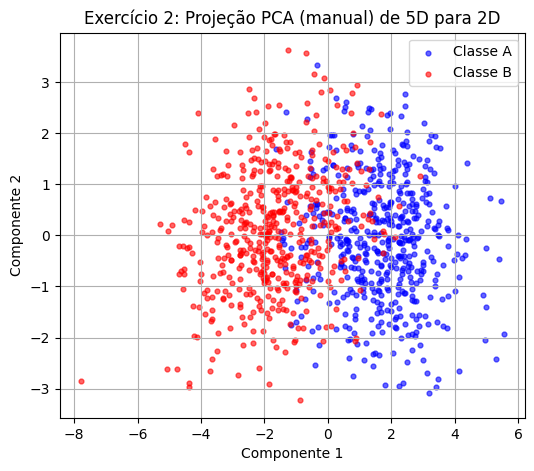

In [2]:
# Exercício 2 – Gerar dados 5D e reduzir para 2D com PCA manual
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Definir médias e covariâncias
mu_A = np.array([0, 0, 0, 0, 0], dtype=float)
Sigma_A = np.array([[1.0, 0.8, 0.1, 0.0, 0.0],
                    [0.8, 1.0, 0.3, 0.0, 0.0],
                    [0.1, 0.3, 1.0, 0.5, 0.0],
                    [0.0, 0.0, 0.5, 1.0, 0.2],
                    [0.0, 0.0, 0.0, 0.2, 1.0]], dtype=float)

mu_B = np.array([1.5, 1.5, 1.5, 1.5, 1.5], dtype=float)
Sigma_B = np.array([[1.5, -0.7, 0.2, 0.0, 0.0],
                    [-0.7, 1.5, 0.4, 0.0, 0.0],
                    [0.2, 0.4, 1.5, 0.6, 0.0],
                    [0.0, 0.0, 0.6, 1.5, 0.3],
                    [0.0, 0.0, 0.0, 0.3, 1.5]], dtype=float)

# Número de amostras por classe
n_amostras = 500

# Gerar amostras
A = np.random.multivariate_normal(mean=mu_A, cov=Sigma_A, size=n_amostras)
B = np.random.multivariate_normal(mean=mu_B, cov=Sigma_B, size=n_amostras)

# Concatenação e rótulos
X = np.vstack([A, B])
y = np.array([0]*n_amostras + [1]*n_amostras)

print(f"Formato dos dados: {X.shape}")

# PCA manual
# 1. Centralizar as variáveis
X_c = X - X.mean(axis=0)

# 2. Matriz de covariância
cov_mat = np.cov(X_c, rowvar=False)

# 3. Autovalores e autovetores
eigvals, eigvecs = np.linalg.eigh(cov_mat)

# 4. Ordenar em ordem decrescente
idx = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[idx]
eigvecs_sorted = eigvecs[:, idx]

# 5. Selecionar dois maiores
W = eigvecs_sorted[:, :2]  # matriz 5x2

# 6. Projetar
X_proj = X_c @ W

# Mostrar variância explicada
var_total = eigvals.sum()
exp_var = eigvals_sorted[:2] / var_total
print(f"Variância explicada pelos dois componentes: {exp_var}")

# Plotar projeção
plt.figure(figsize=(6, 5))
plt.scatter(X_proj[y == 0, 0], X_proj[y == 0, 1], s=12, alpha=0.6, color='blue', label='Classe A')
plt.scatter(X_proj[y == 1, 0], X_proj[y == 1, 1], s=12, alpha=0.6, color='red', label='Classe B')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Exercício 2: Projeção PCA (manual) de 5D para 2D')
plt.legend()
plt.grid(True)
plt.show()


### Análise do Exercício 2

A projeção em duas dimensões evidencia que as classes A e B apresentam sobreposição significativa. Mesmo reduzidas para 2D, as amostras se intercalam em várias regiões do gráfico, sugerindo que a distribuição original em 5D não é linearmente separável. A variância explicada pelos dois maiores componentes principais mostra quanto da informação total é preservada na projeção.

Modelos lineares simples não conseguem separar dados tão entrelaçados; técnicas mais sofisticadas — como redes neurais com camadas ocultas e funções de ativação não lineares — são capazes de aprender fronteiras complexas e capturar dependências não lineares entre variáveis.


## Exercício 3 – Preparar o conjunto de dados Spaceship Titanic

Utilizaremos o dataset **Spaceship Titanic**, disponível na plataforma Kaggle, para praticar pré‑processamento de dados reais. O conjunto é dividido em `train.csv` (registros de aproximadamente dois terços dos passageiros) e `test.csv` (restante). A coluna alvo `Transported` indica se o passageiro foi transportado para outra dimensão (valor booleano).

### Principais campos em `train.csv`

- **PassengerId** – identificador único do passageiro (formato `gggg_pp`, em que `gggg` identifica o grupo e `pp` a posição dentro do grupo).
- **HomePlanet** – planeta de origem do passageiro.
- **CryoSleep** – se o passageiro optou por animação suspensa durante a viagem.
- **Cabin** – cabine do passageiro (`deck/num/side`).
- **Destination** – planeta de destino.
- **Age** – idade.
- **VIP** – se pagou por serviço VIP.
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** – gastos em diferentes amenidades do navio.
- **Name** – nome completo.
- **Transported** – variável alvo (True/False).

### Tarefas de pré‑processamento

1. **Ler o arquivo** `train.csv` usando `pandas`.
2. **Explorar dados**: exibir as primeiras linhas (`head()`), e contar valores ausentes por coluna.
3. **Tratar valores ausentes**:
   - Para colunas numéricas (`Age`, `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`), substituir `NaN` pela mediana da coluna.
   - Para colunas categóricas (`HomePlanet`, `CryoSleep`, `Cabin`, `Destination`, `VIP`), substituir `NaN` por `'Unknown'`.
4. **Codificar categorias**: aplicar *one‑hot encoding* com `pandas.get_dummies`.
5. **Normalizar atributos numéricos**: ajustar para média 0 e desvio 1, calculando `(valor - média)/desvio`.
6. **Visualizar**: plotar histogramas de uma ou duas colunas numéricas (por exemplo, `Age` e `FoodCourt`) antes e depois da normalização para perceber o efeito da escala.

O código a seguir executa essas etapas e imprime estatísticas e gráficos.


Dataset carregado com sucesso. Formato: (8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True



Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None

Valores ausentes por coluna:
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age   

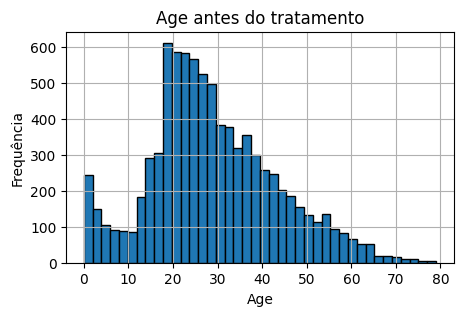

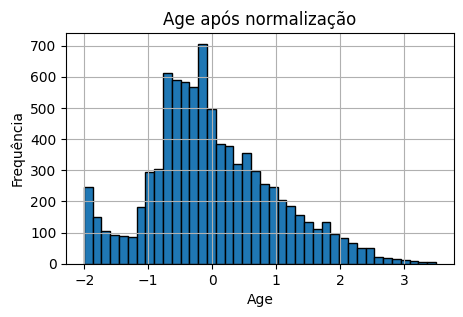

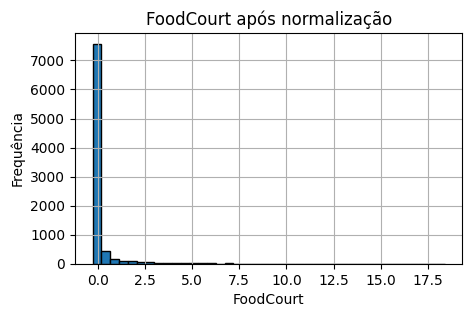

Pré‑processamento concluído. Formato final: (8693, 6582)


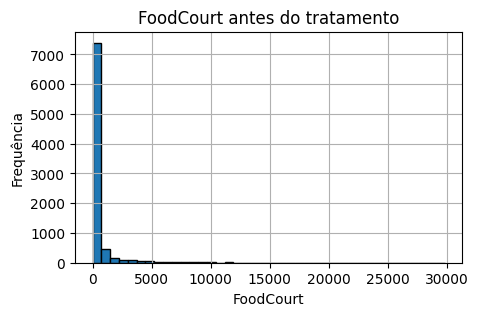

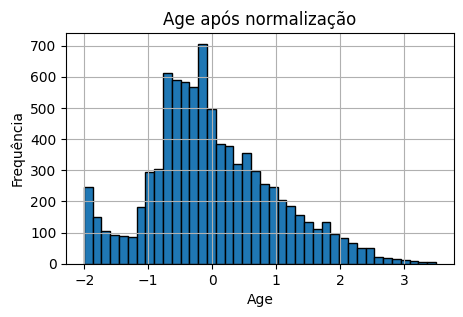

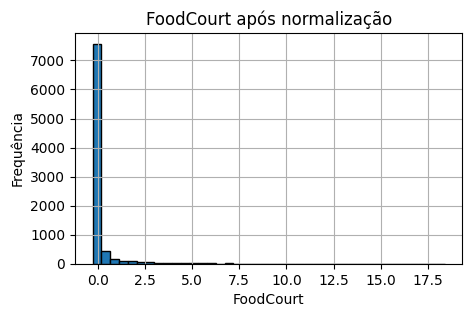

Pré‑processamento concluído. Formato final: (8693, 6582)


In [5]:
# Exercício 3 – Pré‑processar o dataset Spaceship Titanic (se disponível)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tentar ler o arquivo train.csv
try:
    df = pd.read_csv('train.csv')
    print(f"Dataset carregado com sucesso. Formato: {df.shape}")
except FileNotFoundError:
    print('Arquivo train.csv não encontrado. Coloque o arquivo na mesma pasta deste notebook para executar o pré‑processamento.')
    df = None

if df is not None:
    # Exibir cabeçalho
    display(df.head())
print('\nInformações gerais:')
print(df.info())

# Definir colunas numéricas e categóricas
col_numericas = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
col_categoricas = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

# Contar valores ausentes
print('\nValores ausentes por coluna:')
print(df.isna().sum()[df.isna().sum() > 0])

# Plotar histogramas antes da normalização
for col in ['Age', 'FoodCourt']:
    if col in df.columns:
        plt.figure(figsize=(5, 3))
        df[col].dropna().hist(bins=40, edgecolor='k')
        plt.title(f'{col} antes do tratamento')
        plt.xlabel(col)
        plt.ylabel('Frequência')
        plt.show()

    # Copiar dados para processamento
    df_proc = df.copy()

    # Tratar valores ausentes nas numéricas (mediana)
    for c in col_numericas:
        if c in df_proc.columns:
            mediana = df_proc[c].median()
            df_proc[c] = df_proc[c].fillna(mediana)

    # Tratar valores ausentes nas categóricas (Unknown)
    for c in col_categoricas:
        if c in df_proc.columns:
            df_proc[c] = df_proc[c].fillna('Unknown')

    # One-hot encoding
    df_proc = pd.get_dummies(df_proc, columns=[c for c in col_categoricas if c in df_proc.columns], drop_first=False)

    # Remover identificadores se presentes
    for col in ['PassengerId', 'Name']:
        if col in df_proc.columns:
            df_proc = df_proc.drop(columns=col)

    # Normalizar colunas numéricas manualmente: (valor - média)/desvio
    for c in col_numericas:
        if c in df_proc.columns:
            media = df_proc[c].mean()
            desvio = df_proc[c].std()
            if desvio != 0:
                df_proc[c] = (df_proc[c] - media) / desvio
            else:
                df_proc[c] = 0

    # Plotar histogramas após a normalização
    for col in ['Age', 'FoodCourt']:
        if col in df_proc.columns:
            plt.figure(figsize=(5, 3))
            df_proc[col].hist(bins=40, edgecolor='k')
            plt.title(f'{col} após normalização')
            plt.xlabel(col)
            plt.ylabel('Frequência')
            plt.show()

    print('Pré‑processamento concluído. Formato final:', df_proc.shape)


## Resumo e próximos passos

Neste notebook trabalhamos três tarefas principais:

- **Exercício 1:** geramos quatro conjuntos de pontos gaussianos em 2D, visualizamos sua distribuição e concluímos que há sobreposição significativa entre algumas classes, exigindo fronteiras de decisão não lineares para classificá‑las adequadamente.

- **Exercício 2:** construímos duas classes de dados em 5D e realizamos uma redução de dimensionalidade usando PCA implementada manualmente. A projeção mostrou que as classes não são linearmente separáveis, o que reforça a necessidade de modelos não lineares.

- **Exercício 3:** revisamos os campos do dataset Spaceship Titanic, implementamos um pipeline básico de pré‑processamento com tratamento de valores ausentes, codificação de variáveis categóricas e normalização manual de atributos numéricos. Também geramos histogramas para visualizar a distribuição antes e depois da normalização.

### Próximos passos

- Você pode ajustar os parâmetros das distribuições no Exercício 1 para testar diferentes configurações de separabilidade.
- No Exercício 2, experimente projetar em mais componentes ou utilizar outras técnicas de redução (como t‑SNE) para observar o comportamento visual.
- Para o Exercício 3, considere dividir os dados em conjuntos de treino/validação e treinar um modelo simples (por exemplo, regressão logística) para predizer a coluna `Transported`, sempre respeitando as regras de uso de dados do Kaggle.

Para publicar este relatório como página estática, siga o passo a passo descrito anteriormente (converter o notebook para HTML com `nbconvert`, comitar em um repositório GitHub e habilitar o GitHub Pages).
